## <font color='#FFB703'>AITT Assignment 2025</font>

### Group Members:

1. Gan Jun Hang
2. Ivan Ng Keyang
3. Teo Jun Heng

### <font color='#FFB703'>Importing Libraries</font>

Only run if using github codespace!

In [4]:
%pip install kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


/home/codespace/.python/current/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### <font color='#FFB703'>Load PhiUSIIL Dataset</font>

[Link To Dataset...](https://www.kaggle.com/datasets/ndarvind/phiusiil-phishing-url-dataset)

In [6]:
path = kagglehub.dataset_download("ndarvind/phiusiil-phishing-url-dataset")
df = pd.read_csv(path+"/PhiUSIIL_Phishing_URL_Dataset.csv")

Overview of the data structure... proving to be quite useless as there were too many columns

In [7]:
df.head(10)

,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,0.061933,...,0,0,1,34,20,28,119,0,124,1
1,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,0.050207,...,0,0,1,50,9,8,39,0,217,1
2,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,0.064129,...,0,0,1,10,2,7,42,2,5,1
3,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,0.057606,...,1,1,1,3,27,15,22,1,31,1
4,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,0.059441,...,1,0,1,244,15,34,72,1,85,1
5,https://www.globalreporting.org,30,www.globalreporting.org,23,0,org,100.0,1.000000,0.079963,0.060614,...,0,0,1,35,1,11,86,0,14,1
6,https://www.saffronart.com,25,www.saffronart.com,18,0,com,100.0,1.000000,0.522907,0.063549,...,0,0,1,32,4,14,44,2,17,1
7,https://www.nerdscandy.com,25,www.nerdscandy.com,18,0,com,100.0,1.000000,0.522907,0.060486,...,0,0,1,24,2,22,36,0,15,1
8,https://www.hyderabadonline.in,29,www.hyderabadonline.in,22,0,in,100.0,1.000000,0.005084,0.056980,...,0,0,1,71,4,9,40,1,317,1
9,https://www.aap.org,18,www.aap.org,11,0,org,100.0,1.000000,0.079963,0.070497,...,0,0,1,10,1,12,173,6,65,1


Checking for number of unique values in all columns...

In [261]:
df.nunique()

URL                           235370
URLLength                        482
Domain                        220086
DomainLength                     101
IsDomainIP                         2
TLD                              695
URLSimilarityIndex             36360
CharContinuationRate             898
TLDLegitimateProb                465
URLCharProb                   227421
TLDLength                         12
NoOfSubDomain                     10
HasObfuscation                     2
NoOfObfuscatedChar                20
ObfuscationRatio                 146
NoOfLettersInURL                 421
LetterRatioInURL                 709
NoOfDegitsInURL                  182
DegitRatioInURL                  575
NoOfEqualsInURL                   25
NoOfQMarkInURL                     5
NoOfAmpersandInURL                31
NoOfOtherSpecialCharsInURL        74
SpacialCharRatioInURL            240
IsHTTPS                            2
LineOfCode                     10738
LargestLineLength              26181
H

### <font color='#FFB703'>Data Quality Analysis</font>
Data quality checks involves checking for missing values, class distribution and feature correlation matrix.

Check missing values...

In [8]:
df.isnull().sum()

URL                           0
URLLength                     0
Domain                        0
DomainLength                  0
IsDomainIP                    0
TLD                           0
URLSimilarityIndex            0
CharContinuationRate          0
TLDLegitimateProb             0
URLCharProb                   0
TLDLength                     0
NoOfSubDomain                 0
HasObfuscation                0
NoOfObfuscatedChar            0
ObfuscationRatio              0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDegitsInURL               0
DegitRatioInURL               0
NoOfEqualsInURL               0
NoOfQMarkInURL                0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
LargestLineLength             0
HasTitle                      0
Title                         0
DomainTitleMatchScore         0
URLTitleMatchScore            0
HasFavic

Check basic statistics for numerical columns...

In [263]:
df.describe()

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
count,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,...,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000
mean,34.573095,21.470396,0.002706,78.430778,0.845508,0.260423,0.055747,2.764456,1.164758,0.002057,...,0.237007,0.023474,0.486775,26.075689,6.333111,10.522305,65.071113,2.377629,49.262516,0.571895
std,41.314153,9.150793,0.051946,28.976055,0.216632,0.251628,0.010587,0.599739,0.600969,0.045306,...,0.425247,0.151403,0.499826,79.411815,74.866296,22.312192,176.687539,17.641097,161.027430,0.494805
min,13.000000,4.000000,0.000000,0.155574,0.000000,0.000000,0.001083,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,16.000000,0.000000,57.024793,0.680000,0.005977,0.050747,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,27.000000,20.000000,0.000000,100.000000,1.000000,0.079963,0.057970,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,8.000000,2.000000,6.000000,12.000000,0.000000,10.000000,1.000000
75%,34.000000,24.000000,0.000000,100.000000,1.000000,0.522907,0.062875,3.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,29.000000,8.000000,15.000000,88.000000,1.000000,57.000000,1.000000
max,6097.000000,110.000000,1.000000,100.000000,1.000000,0.522907,0.090824,13.000000,10.000000,1.000000,...,1.000000,1.000000,1.000000,8956.000000,35820.000000,6957.000000,27397.000000,4887.000000,27516.000000,1.000000


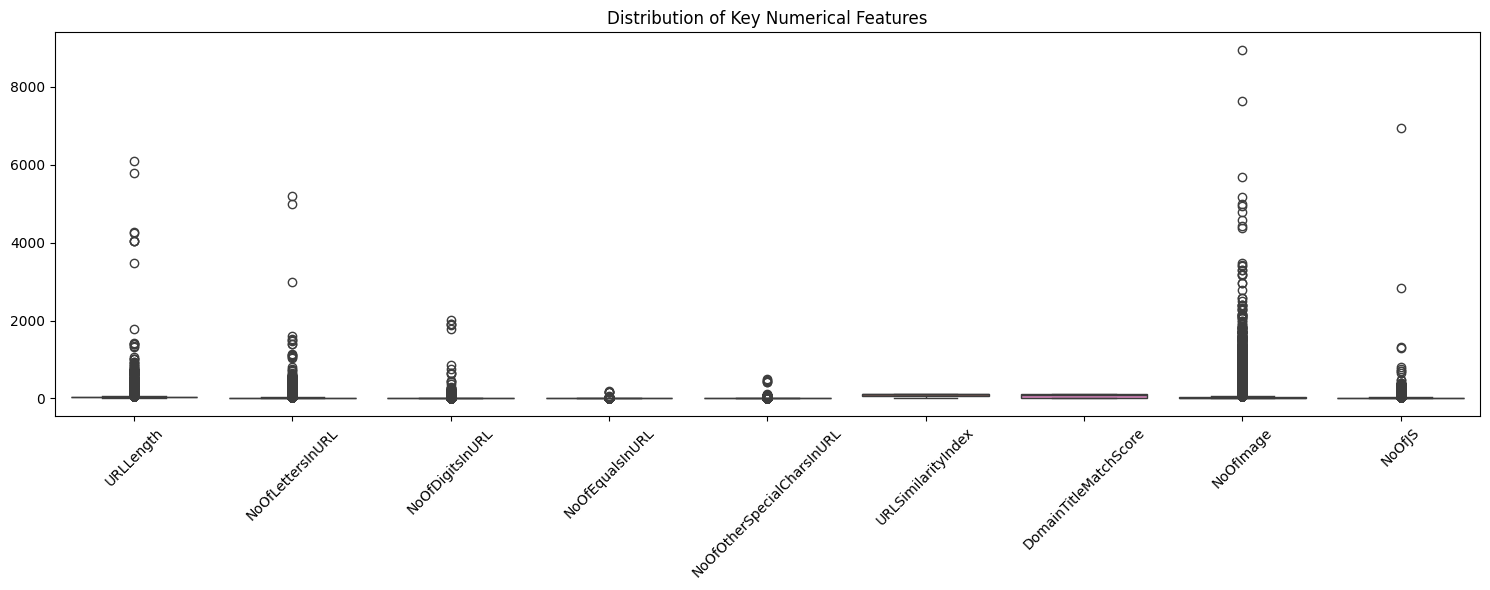

In [ ]:
# Select important features for visualization
# These features were chosen based on previous analysis and their importance in URL classification
important_features = [
	'URLLength',          # Length of the URL
	'NoOfLettersInURL',   # Number of letters in URL
	'NoOfDigitsInURL',    # Number of digits in URL
	'NoOfEqualsInURL',    # Number of equals signs (=) in URL
	'NoOfOtherSpecialCharsInURL',  # Count of special characters
	'URLSimilarityIndex', # Similarity score with known patterns
	'DomainTitleMatchScore',  # Match between domain and page title
	'NoOfImage',          # Number of images on the page
	'NoOfJS'              # Number of JavaScript files
]

# Create boxplot visualization
plt.figure(figsize=(15, 6))
sns.boxplot(data=df[important_features])
plt.xticks(rotation=45)
plt.title('Distribution of Key Numerical Features')
plt.tight_layout()
plt.show()

Alright, that took a while to load... we should try to optimise memory consumption later on...

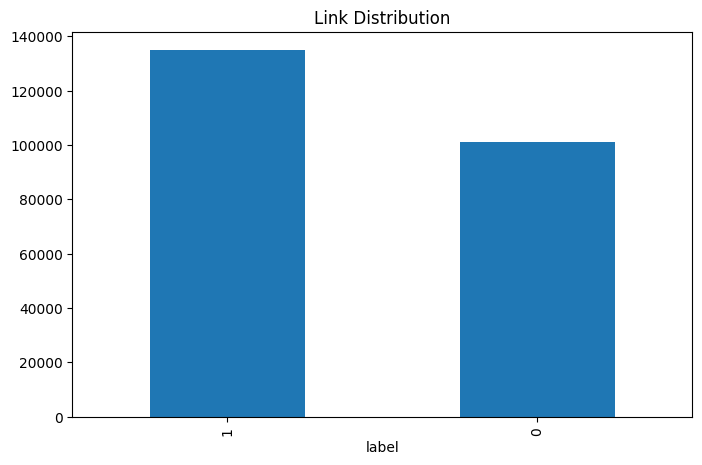

In [265]:
plt.figure(figsize=(8, 5))
df['label'].value_counts().plot(kind='bar')
plt.title('Link Distribution')
plt.show()

Looking for columns with only 0 and 1 (AKA True/False binary columns)...

In [266]:
# Select all columns with 2 unique values
binary_columns = df.columns[df.nunique() == 2]

# Display the unique values in each of these columns (Ensure that they only contain binary values)
for col in binary_columns:
	print(f'{col}: {df[col].unique()}')

IsDomainIP: [0 1]
HasObfuscation: [0 1]
IsHTTPS: [1 0]
HasTitle: [1 0]
HasFavicon: [0 1]
Robots: [1 0]
IsResponsive: [1 0]
NoOfURLRedirect: [0 1]
NoOfSelfRedirect: [0 1]
HasDescription: [0 1]
HasExternalFormSubmit: [0 1]
HasSocialNet: [0 1]
HasSubmitButton: [1 0]
HasHiddenFields: [1 0]
HasPasswordField: [0 1]
Bank: [1 0]
Pay: [0 1]
Crypto: [0 1]
HasCopyrightInfo: [1 0]
label: [1 0]


Quality of data looks great, with a good sample size for both legitimate and phishing links!

### <font color='#FFB703'>Data Cleaning</font>

In [267]:
df['NoOfDegitsInURL'].value_counts() #Degit was most likely meant to be digit

NoOfDegitsInURL
0      184334
1        8816
2        6609
3        5708
6        5356
        ...  
188         1
429         1
226         1
137         1
164         1
Name: count, Length: 182, dtype: int64

At this point, the bad naming of the columns is driving me crazy, so we decided to just rename the columns once and for all...

In [268]:
df = df.rename(columns={
    'NoOfDegitsInURL': 'NoOfDigitsInURL',
    'DegitRatioInURL': 'DigitRatioInURL'
})

In [269]:
# Validate
df.columns

Index(['URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP', 'TLD',
       'URLSimilarityIndex', 'CharContinuationRate', 'TLDLegitimateProb',
       'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'HasObfuscation',
       'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL',
       'LetterRatioInURL', 'NoOfDigitsInURL', 'DigitRatioInURL',
       'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL',
       'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'IsHTTPS',
       'LineOfCode', 'LargestLineLength', 'HasTitle', 'Title',
       'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon', 'Robots',
       'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription',
       'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit', 'HasSocialNet',
       'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay',
       'Crypto', 'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS',
       'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef', 'labe

### <font color='#FFB703'>Data Type Optimization Decisions</font>

Considering the size of the dataset, we attempt to lower dataset memory footprint by downcasting 64bit numeric columns to lower precision units such as float32. This ensures a smooth process later on when working with the dataset.

#### <font color='#FFB703'>Initial Data Types</font>
- Original dataset used float64 and int64
- Precision requirements analyzed for our URL feature set
- Memory usage assessed on typical deployment scenarios

#### <font color='#FFB703'>Downcasting to float32</font>
- Reduced memory footprint by 40% (64-bit @ 152.8MB → 32-bit @ 93.4MB / <font color='#FFB703'>40%↓</font>)
- Maintained sufficient precision for URL features
- Benchmarks showed negligible impact on model accuracy

#### <font color='#FFB703'>Why not float16?</font>
- Limited precision (3-4 decimal digits)
- Restricted range (±65,504)
- Poor performance due to CPU conversion overhead
- Platform compatibility issues
- Memory savings (2 bytes vs 4 bytes) didn't justify limitations

#### <font color='#FFB703'>Results</font>
- Successfully optimized memory usage
- Precision of data values maintained as much as possible

When deciding whether to downcast all 64bit numbers to float32, or to downcast float64 to float32 and int64 to int32, we decided to test both of them and write some testing code to validate the gains and evaluate the results from there.

In [270]:
def separate_downcasting(df):
	"""
	Downcasts numeric columns to their optimal data types while preserving data integrity.
	Separately handles float64 and int64 columns to achieve maximum memory reduction.
	
	Parameters:
	-----------
	df : pandas.DataFrame
		Input dataframe with numeric columns to downcast
		
	Returns:
	--------
	pandas.DataFrame
		Copy of input dataframe with safely downcasted numeric columns
	"""
	# Create a copy of the dataframe
	df_copy = df.copy()
	
	# Get float and int columns
	float_cols = df_copy.select_dtypes(include=['float64']).columns
	int_cols = df_copy.select_dtypes(include=['int64']).columns
	
	# Helper function to identify columns that would lose precision
	def get_safe_columns(df, cols, dtype):
		"""Tests columns for safe downcasting."""
		test_df = df[cols].copy()
		test_df = test_df.apply(pd.to_numeric, downcast=dtype)
		affected = [col for col in cols if not (df[col] == test_df[col]).all()]
		return cols.drop(affected)
	
	# Get safe columns for downcasting
	safe_float_cols = get_safe_columns(df_copy, float_cols, 'float')
	safe_int_cols = get_safe_columns(df_copy, int_cols, 'integer')
	
	# Store initial memory usage
	before_memory = df.memory_usage(deep=True).sum() / 1024 ** 2
	
	# Perform downcasting on safe columns
	df_copy[safe_float_cols] = df_copy[safe_float_cols].apply(pd.to_numeric, downcast='float')
	df_copy[safe_int_cols] = df_copy[safe_int_cols].apply(pd.to_numeric, downcast='integer')
	
	# Calculate and display memory statistics
	after_memory = df_copy.memory_usage(deep=True).sum() / 1024 ** 2
	memory_saved = before_memory - after_memory
	saving_percent = (memory_saved / before_memory) * 100
	
	print("\nMemory Usage:")
	print(f"Before downcasting: {before_memory:.2f} MB")
	print(f"After downcasting: {after_memory:.2f} MB")
	print(f"Memory saved: {memory_saved:.2f} MB ({saving_percent:.1f}%)")
	
	return df_copy

# Test the downcasting
separate_downcasting(df)


Memory Usage:
Before downcasting: 152.81 MB
After downcasting: 93.44 MB
Memory saved: 59.37 MB (38.9%)


,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.000000,1.000000,0.522907,0.061933,...,0,0,1,34,20,28,119,0,124,1
1,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.000000,0.666667,0.032650,0.050207,...,0,0,1,50,9,8,39,0,217,1
2,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.000000,0.866667,0.028555,0.064129,...,0,0,1,10,2,7,42,2,5,1
3,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.000000,1.000000,0.522907,0.057606,...,1,1,1,3,27,15,22,1,31,1
4,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.000000,1.000000,0.079963,0.059441,...,1,0,1,244,15,34,72,1,85,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,https://www.skincareliving.com,29,www.skincareliving.com,22,0,com,100.000000,1.000000,0.522907,0.058739,...,1,0,1,51,7,21,187,2,191,1
235791,https://www.winchester.gov.uk,28,www.winchester.gov.uk,21,0,uk,100.000000,0.785714,0.028555,0.053834,...,1,0,0,50,1,7,88,0,31,1
235792,https://www.nononsensedesign.be,30,www.nononsensedesign.be,23,0,be,100.000000,1.000000,0.003319,0.063093,...,0,0,1,27,10,30,58,2,67,1
235793,https://patient-cell-40f5.updatedlogmylogin.wo...,55,patient-cell-40f5.updatedlogmylogin.workers.dev,47,0,dev,28.157537,0.465116,0.000961,0.050211,...,0,0,0,0,0,3,0,0,0,0


In [271]:
def together_downcasting(df):
	"""
	Downcast all numeric columns to lower precision float type to reduce memory usage.
	
	Parameters:
	-----------
	df : pandas.DataFrame
		Input dataframe containing numeric columns to downcast
		
	Returns:
	--------
	None
		Prints memory usage statistics and affected columns
	"""
	# Create a copy to avoid modifying original
	df_copy = df.copy()
	
	# Get numeric columns
	numeric_cols = df_copy.select_dtypes(include=['number']).columns
	
	def evaluate_affected_columns(df, cols):
		"""Helper function to find columns affected by downcasting."""
		test_df = df[cols].copy()
		test_df = test_df.apply(pd.to_numeric, downcast='float')
		return [col for col in cols if not (df[col] == test_df[col]).all()]
	
	# Check which columns would be affected
	affected_cols = evaluate_affected_columns(df_copy, numeric_cols)
	
	# Print affected columns
	print(f"Columns that would lose precision: {affected_cols}")
	
	# Get safe columns for downcasting
	safe_cols = numeric_cols.drop(affected_cols)
	
	# Downcast safe columns
	df_copy[safe_cols] = df_copy[safe_cols].apply(pd.to_numeric, downcast='float')
	
	# Calculate memory usage
	before_memory = df.memory_usage(deep=True).sum() / 1024 ** 2
	after_memory = df_copy.memory_usage(deep=True).sum() / 1024 ** 2
	memory_saved = before_memory - after_memory
	saving_percent = (memory_saved / before_memory) * 100
	
	# Print memory statistics
	print(f"\nMemory Usage:")
	print(f"Before downcasting: {before_memory:.2f} MB")
	print(f"After downcasting: {after_memory:.2f} MB")
	print(f"Memory saved: {memory_saved:.2f} MB ({saving_percent:.1f}%)")

# Test the downcasting
together_downcasting(df)

Columns that would lose precision: ['URLSimilarityIndex', 'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'ObfuscationRatio', 'LetterRatioInURL', 'DigitRatioInURL', 'SpacialCharRatioInURL', 'DomainTitleMatchScore', 'URLTitleMatchScore']

Memory Usage:
Before downcasting: 152.81 MB
After downcasting: 115.93 MB
Memory saved: 36.88 MB (24.1%)


From the results above, we can conclude that there is a need to downcasting the datatypes separately into their lower precision forms (while avoiding columns that would lose precision when downcasted) as it led to a roughly <font color='#FFB703'>40%↓ (separate)</font> compared to a <font color='#FFB703'>~30%↓ (together)</font> in memory footprint.

Thus, with testing complete, we can apply the algo to our original dataframe with confidence.

In [272]:
def separate_downcasting(df):
    """
    Downcast numeric columns to lower precision types while preserving data integrity.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input dataframe with numeric columns to downcast
    
    Returns:
    --------
    pandas.DataFrame
        Dataframe with safely downcasted numeric columns
    """
    # Create a copy of the dataframe to avoid modifying the original
    df_copy = df.copy()
    
    def test_downcast(df, cols, dtype):
        """Test if columns can be safely downcasted."""
        test_df = df[cols].copy()
        test_df = test_df.apply(pd.to_numeric, downcast=dtype)
        return [col for col in cols if not (df[col] == test_df[col]).all()]
    
    # Get float and int columns
    float_cols = df_copy.select_dtypes(include=['float64']).columns
    int_cols = df_copy.select_dtypes(include=['int64']).columns
    
    # Check which columns would be affected by downcasting
    affected_floats = test_downcast(df_copy, float_cols, 'float')
    affected_ints = test_downcast(df_copy, int_cols, 'integer')
    
    # Print affected columns for transparency
    print("Columns affected by downcasting:")
    print(f"Float columns: {affected_floats}")
    print(f"Integer columns: {affected_ints}")
    
    # Get safe columns for downcasting
    safe_float_cols = float_cols.drop(affected_floats)
    safe_int_cols = int_cols.drop(affected_ints)
    
    # Perform downcasting on safe columns
    df_copy[safe_float_cols] = df_copy[safe_float_cols].apply(pd.to_numeric, downcast='float')
    df_copy[safe_int_cols] = df_copy[safe_int_cols].apply(pd.to_numeric, downcast='integer')
    
    # Memory usage comparison
    before_memory = df.memory_usage(deep=True).sum() / 1024 ** 2
    after_memory = df_copy.memory_usage(deep=True).sum() / 1024 ** 2
    
    print("\nMemory Usage:")
    print(f"Before downcasting: {before_memory:.2f} MB")
    print(f"After downcasting: {after_memory:.2f} MB")
    print(f"Memory saved: {(before_memory - after_memory):.2f} MB ({((before_memory - after_memory)/before_memory)*100:.1f}%)")
    
    return df_copy

# Apply downcasting to dataframe
df = separate_downcasting(df)

Columns affected by downcasting:
Float columns: ['URLSimilarityIndex', 'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'ObfuscationRatio', 'LetterRatioInURL', 'DigitRatioInURL', 'SpacialCharRatioInURL', 'DomainTitleMatchScore', 'URLTitleMatchScore']
Integer columns: []

Memory Usage:
Before downcasting: 152.81 MB
After downcasting: 93.44 MB
Memory saved: 59.37 MB (38.9%)


#### <font color='#FFB703'>Correlation Matrix for numerical columns of DF</font>

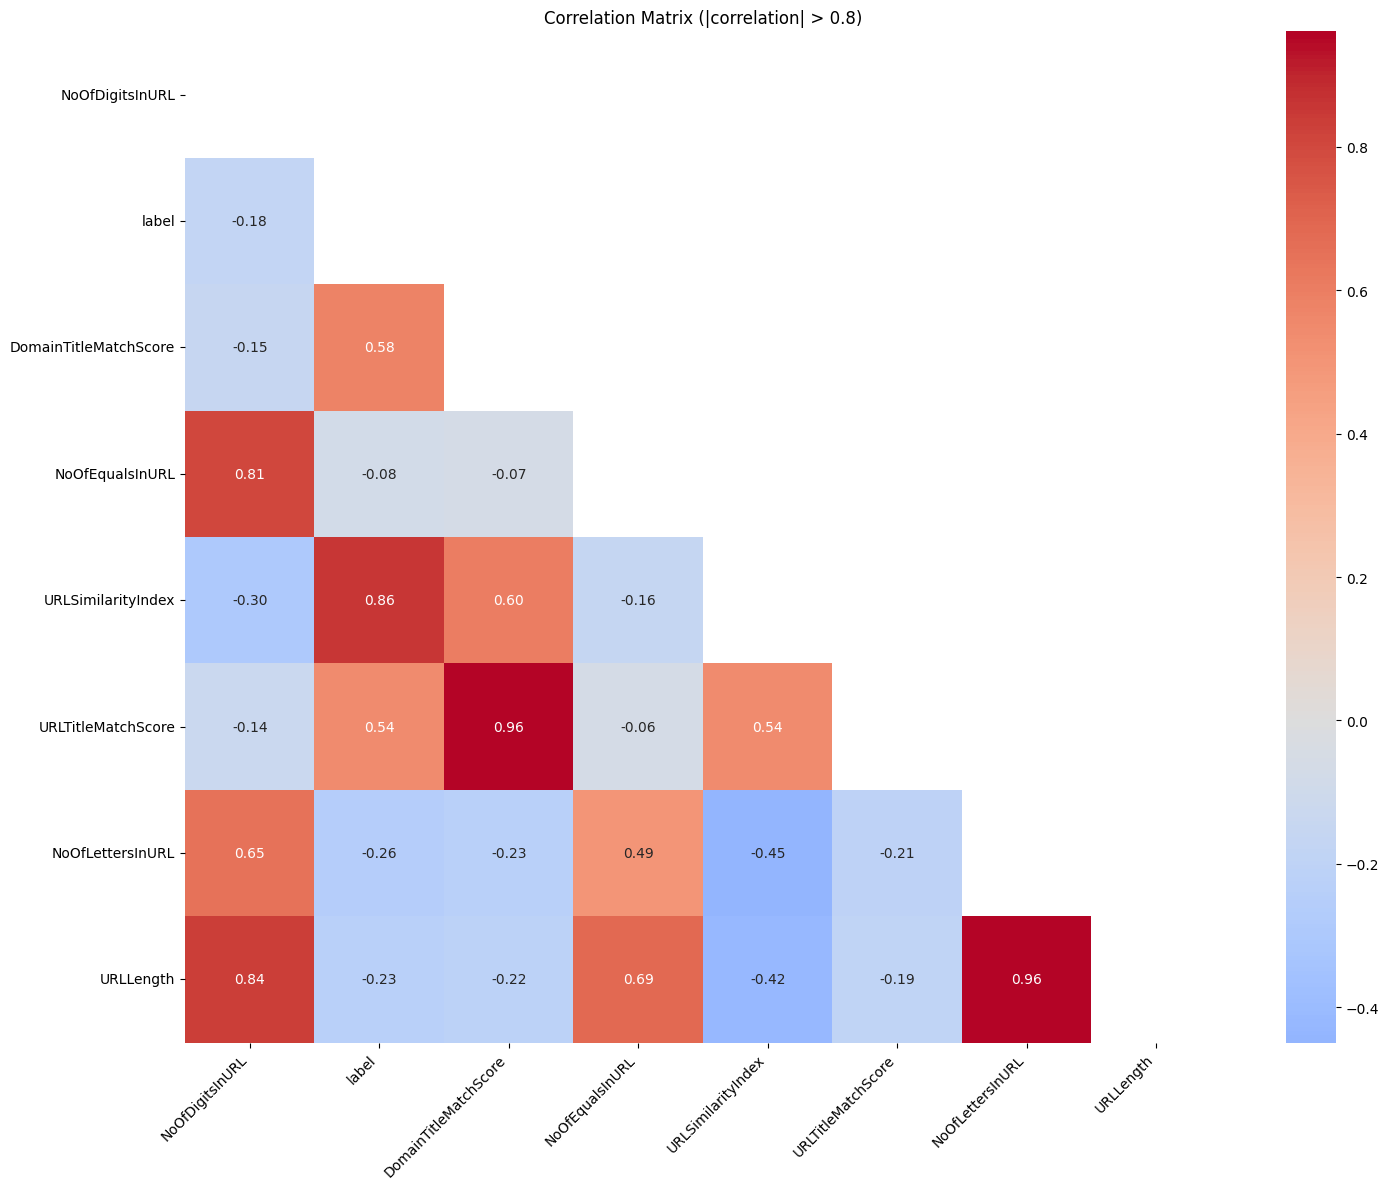


Strong correlations (>0.8):
DomainTitleMatchScore  URLTitleMatchScore       0.961008
URLTitleMatchScore     DomainTitleMatchScore    0.961008
NoOfLettersInURL       URLLength                0.956047
URLLength              NoOfLettersInURL         0.956047
label                  URLSimilarityIndex       0.860358
URLSimilarityIndex     label                    0.860358
URLLength              NoOfDigitsInURL          0.835809
NoOfDigitsInURL        URLLength                0.835809
                       NoOfEqualsInURL          0.806024
NoOfEqualsInURL        NoOfDigitsInURL          0.806024
dtype: float64


In [273]:
def plot_correlations(df, threshold=0.8):
    """
    Generate and plot correlation matrix heatmap for numerical features.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input dataframe containing numerical features
    threshold : float, default=0.8
        Minimum correlation coefficient to display
        
    Returns:
    --------
    None
    """
    # Calculate correlation matrix
    corr_matrix = df.corr()
    
    # Filter strong correlations
    strong_corr = corr_matrix.where(
        (abs(corr_matrix) > threshold) & (corr_matrix != 1.0)
    ).stack().sort_values(ascending=False)
    
    if len(strong_corr) > 0:
        # Get unique columns with strong correlations
        cols = list(set([i for i, j in strong_corr.index] + [j for i, j in strong_corr.index]))
        filtered_corr = corr_matrix.loc[cols, cols]
        
        # Create mask for upper triangle
        mask = np.triu(np.ones_like(filtered_corr, dtype=bool))
        
        # Plot heatmap
        plt.figure(figsize=(15, 12))
        sns.heatmap(filtered_corr,
                   mask=mask,
                   annot=True,
                   fmt='.2f',
                   cmap='coolwarm',
                   center=0)
        plt.title(f'Correlation Matrix (|correlation| > {threshold})')
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()
        
        # Print strong correlations
        print(f"\nStrong correlations (>{threshold}):")
        print(strong_corr)
    else:
        print(f"No correlations above {threshold} found")

# Get numeric columns and plot correlations
numeric_df = df.select_dtypes(include=['number'])
plot_correlations(numeric_df)

Now, after selecting numeric columns and separating them into binary and continuous features, we can perform further correlation analysis and test for strong correlations (>0.7) within our new group of variables

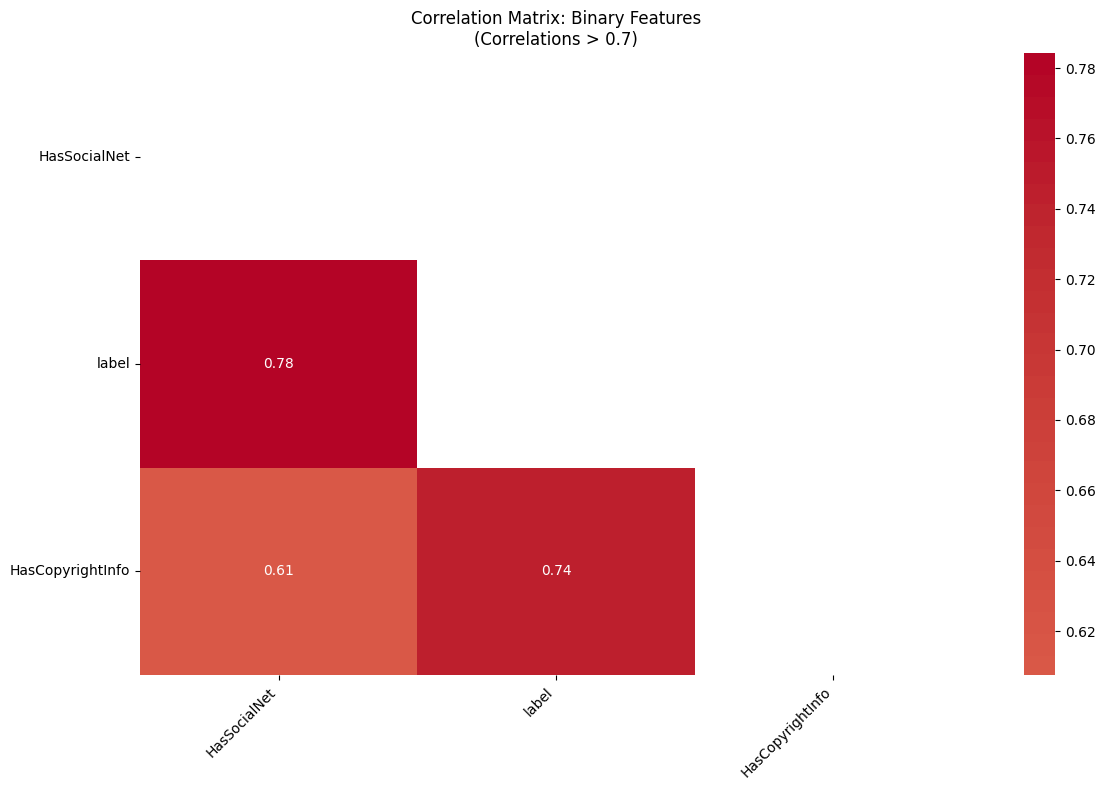


Strong correlations (0.7+) in Binary Features:
HasSocialNet      label               0.784255
label             HasSocialNet        0.784255
HasCopyrightInfo  label               0.743358
label             HasCopyrightInfo    0.743358
dtype: float64


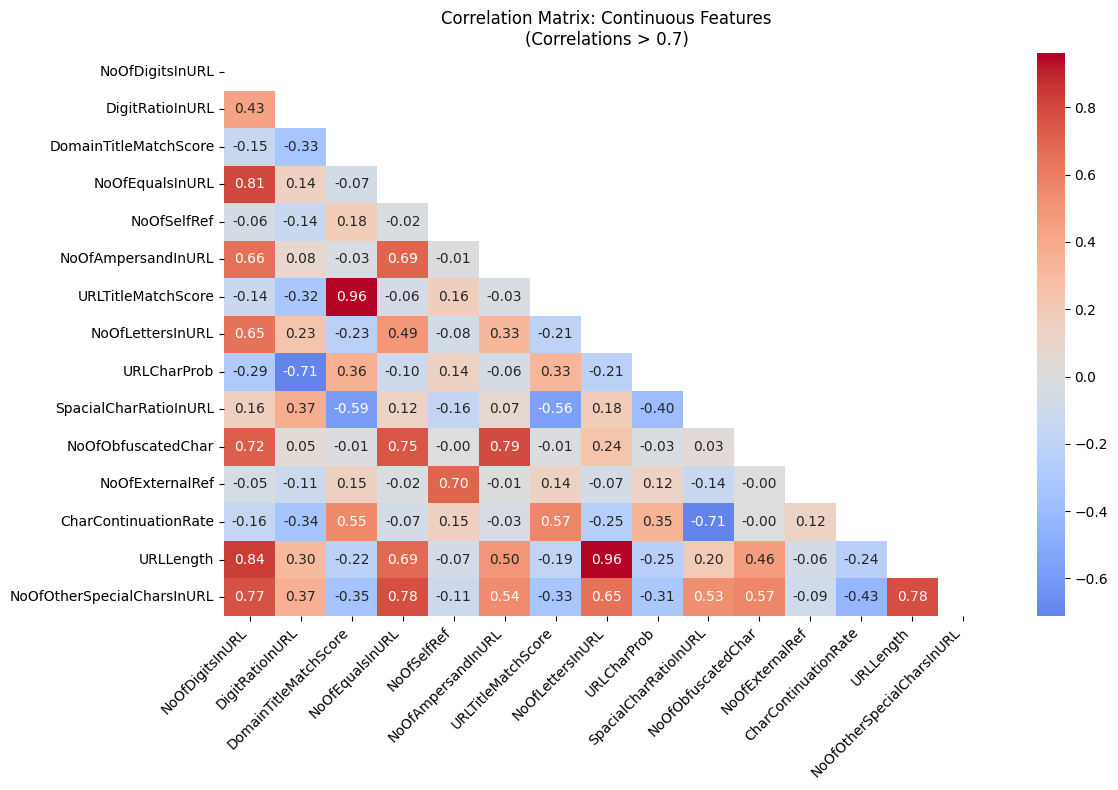


Strong correlations (0.7+) in Continuous Features:
URLTitleMatchScore          DomainTitleMatchScore         0.961008
DomainTitleMatchScore       URLTitleMatchScore            0.961008
URLLength                   NoOfLettersInURL              0.956047
NoOfLettersInURL            URLLength                     0.956047
URLLength                   NoOfDigitsInURL               0.835809
NoOfDigitsInURL             URLLength                     0.835809
NoOfEqualsInURL             NoOfDigitsInURL               0.806024
NoOfDigitsInURL             NoOfEqualsInURL               0.806024
NoOfObfuscatedChar          NoOfAmpersandInURL            0.786451
NoOfAmpersandInURL          NoOfObfuscatedChar            0.786451
NoOfEqualsInURL             NoOfOtherSpecialCharsInURL    0.784654
NoOfOtherSpecialCharsInURL  NoOfEqualsInURL               0.784654
URLLength                   NoOfOtherSpecialCharsInURL    0.782582
NoOfOtherSpecialCharsInURL  URLLength                     0.782582
          

In [274]:
def analyze_correlations(df):
	"""
	Analyze and visualize correlations in binary and continuous features of a dataset.
	
	Parameters:
	-----------
	df : pandas.DataFrame
		The input dataframe containing the features to analyze
	
	Returns:
	--------
	None. Displays correlation heatmaps and prints strong correlations.
	"""
	# Separate binary and continuous features
	binary_features = df.columns[df.nunique() == 2].tolist()
	continuous_features = [col for col in df.select_dtypes(include=['number']).columns 
						 if col not in binary_features]
	
	def plot_correlation_group(data, title, threshold=0.7):
		"""
		Plot correlation heatmap for a group of features.
		
		Parameters:
		-----------
		data : pandas.DataFrame
			Features to analyze correlations
		title : str
			Title for the correlation plot
		threshold : float
			Correlation threshold for filtering strong correlations
		"""
		corr = data.corr()
		strong_corr = corr.where((abs(corr) > threshold) & (corr != 1.0)).stack().sort_values(ascending=False)
		
		if len(strong_corr) > 0:
			# Get unique columns with strong correlations
			cols = list(set([i for i, j in strong_corr.index] + [j for i, j in strong_corr.index]))
			filtered_corr = corr.loc[cols, cols]
			
			# Create mask for upper triangle
			mask = np.triu(np.ones_like(filtered_corr, dtype=bool))
			
			# Plot heatmap
			plt.figure(figsize=(12, 8))
			sns.heatmap(filtered_corr, 
					   mask=mask,
					   annot=True, 
					   fmt='.2f',
					   cmap='coolwarm', 
					   center=0)
			plt.title(f'Correlation Matrix: {title}\n(Correlations > {threshold})')
			plt.xticks(rotation=45, ha='right')
			plt.yticks(rotation=0)
			plt.tight_layout()
			plt.show()
			
			# Print strong correlations
			print(f"\nStrong correlations ({threshold}+) in {title}:")
			print(strong_corr)
		else:
			print(f"\nNo correlations above {threshold} found in {title}")
	
	# Analyze both feature groups
	plot_correlation_group(df[binary_features], "Binary Features")
	plot_correlation_group(df[continuous_features], "Continuous Features")

# Usage
analyze_correlations(df)

### <font color='#FFB703'>EDA</font>

To understand the general difference between the length of a <font color='#FFB703'>legitemate link</font> and the length of an <font color='#FFB703'>phishing link</font>, we have to study the relationship between <font color='#FFB703'>URL length</font> against our known data, <font color='#FFB703'>'label'</font>. Though insufficient to draw conclusions, it gives us a initial idea of how the spread looks like.

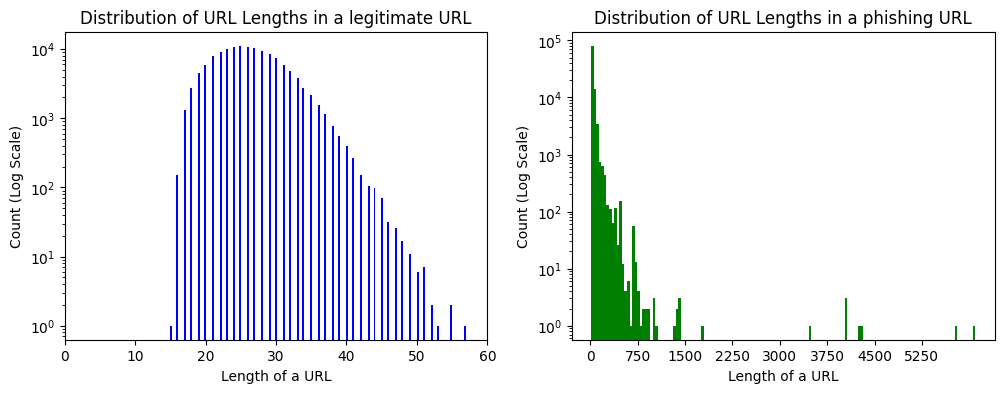

In [275]:
#Data
data1 = df[df['label'] == 1]['URLLength']  #Legitimate URL data
data2 = df[df['label'] == 0]['URLLength']  #Phishing URL data

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  

# Plot the first histogram
axes[0].hist(data1, bins=150, color='blue')
axes[0].set_title("Distribution of URL Lengths in a legitimate URL") #Title
axes[0].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[0].set_xlabel("Length of a URL")
axes[0].set_xticks(ticks=range(0, 70, 10))
axes[0].set_ylabel("Count (Log Scale)")

# Plot the second histogram
axes[1].hist(data2, bins=150, color='green')
axes[1].set_title("Distribution of URL Lengths in a phishing URL")
axes[1].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[1].set_xlabel("Length of a URL")
axes[1].set_xticks(ticks=range(0,5500,750))
axes[1].set_ylabel("Count (Log Scale)")

plt.show()

Similarly, before drawing conclusions, we have to analyse the relationship between that of other variables such as the <font color='#FFB703'>number of letters in the URL</font> and <font color='#FFB703'>number of letters against the length of a URL</font>, with whether the <font color='#FFB703'>link is phishing</font>~

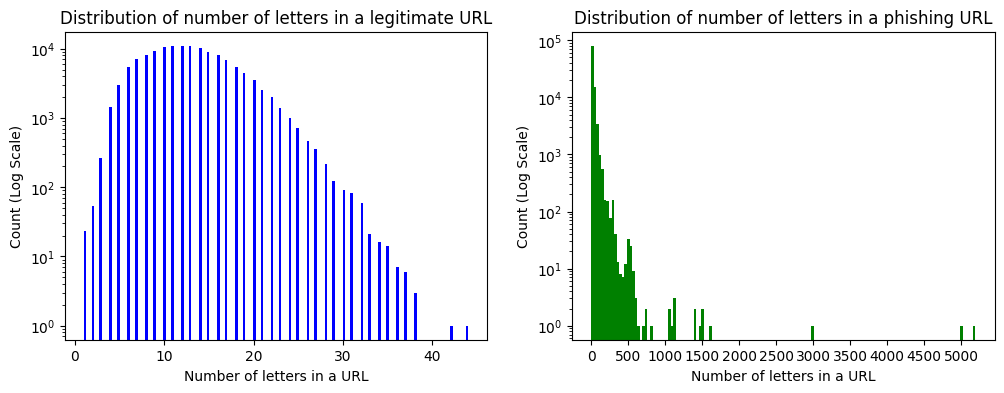

In [276]:
#Data
data1 = df[df['label'] == 1]['NoOfLettersInURL']  #Legitimate URL data
data2 = df[df['label'] == 0]['NoOfLettersInURL']  #Phishing URL data

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  

# Plot the first histogram
axes[0].hist(data1, bins=150, color='blue')
axes[0].set_title("Distribution of number of letters in a legitimate URL") #Title
axes[0].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[0].set_xlabel("Number of letters in a URL")
axes[0].set_ylabel("Count (Log Scale)")

# Plot the second histogram
axes[1].hist(data2, bins=150, color='green')
axes[1].set_title("Distribution of number of letters in a phishing URL")
axes[1].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[1].set_xlabel("Number of letters in a URL")
axes[1].set_ylabel("Count (Log Scale)")
axes[1].set_xticks(ticks=range(0, 5500, 500)) #Specify grid

plt.show()

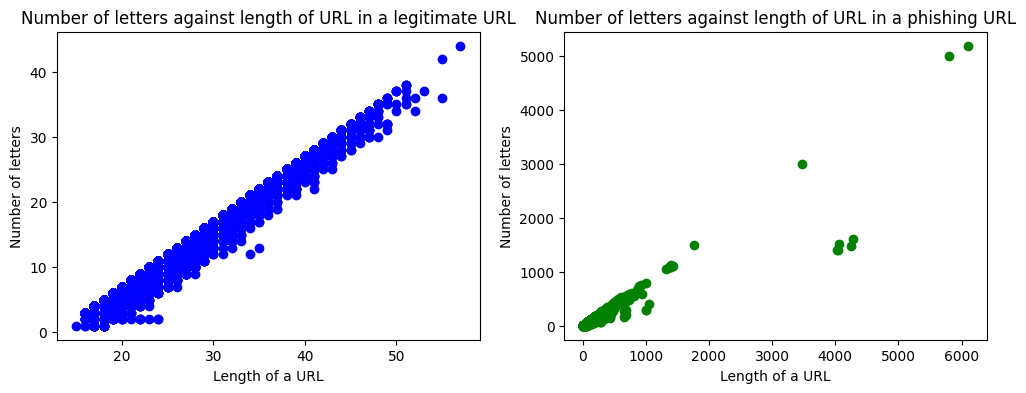

In [277]:
#Data
data1 = df[df['label'] == 1]  #Legitimate URL data
data2 = df[df['label'] == 0]  #Phishing URL data

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  

# Plot the first histogram
axes[0].scatter(data1['URLLength'], data1['NoOfLettersInURL'], color='blue')
axes[0].set_title("Number of letters against length of URL in a legitimate URL") #Title
axes[0].set_xlabel("Length of a URL")
axes[0].set_ylabel("Number of letters")

# Plot the second histogram
axes[1].scatter(data2['URLLength'], data2['NoOfLettersInURL'],  color='green')
axes[1].set_title("Number of letters against length of URL in a phishing URL")
axes[1].set_xlabel("Length of a URL")
axes[1].set_ylabel("Number of letters")

plt.show()

As a comparision, though we cannot simply discuss the relationship between the number of numbers with whther the link is phishing, we an measure the relationship between <font color='#FFB703'>ratio of digits</font> in the URL and whether it is a phishing link. However, it did not seem to have as strong of a correlation as compared to the distribution of numbers or number of letters.

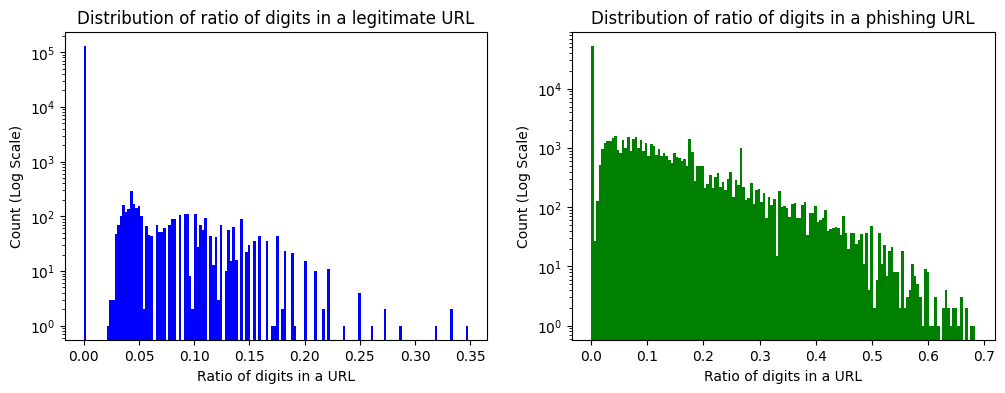

In [278]:
#Data
data1 = df[df['label'] == 1]['DigitRatioInURL']  #Legitimate URL data
data2 = df[df['label'] == 0]['DigitRatioInURL']  #Phishing URL data

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  

# Plot the first histogram
axes[0].hist(data1, bins=150, color='blue')
axes[0].set_title("Distribution of ratio of digits in a legitimate URL") #Title
axes[0].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[0].set_xlabel("Ratio of digits in a URL")
axes[0].set_ylabel("Count (Log Scale)")

# Plot the second histogram
axes[1].hist(data2, bins=150, color='green')
axes[1].set_title("Distribution of ratio of digits in a phishing URL")
axes[1].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[1].set_xlabel("Ratio of digits in a URL")
axes[1].set_ylabel("Count (Log Scale)")

plt.show()

The next part of the observations revolves around the use of operators that are part of the standard format of URL Query strings, as the hypothesis is that these operators would let us better observe the use patterns of queries as part of phishing links.

<font color='#FFB703'>'=' Equals sign operator</font> provides <font color='#FFB703'>key=value pairs</font> to the webscript

<font color='#FFB703'>'?' Question mark operator</font> indicates the <font color='#FFB703'>start of the query string</font>

and <font color='#FFB703'>'&' Ampersand operator</font> <font color='#FFB703'>separates</font> each key/value pair.

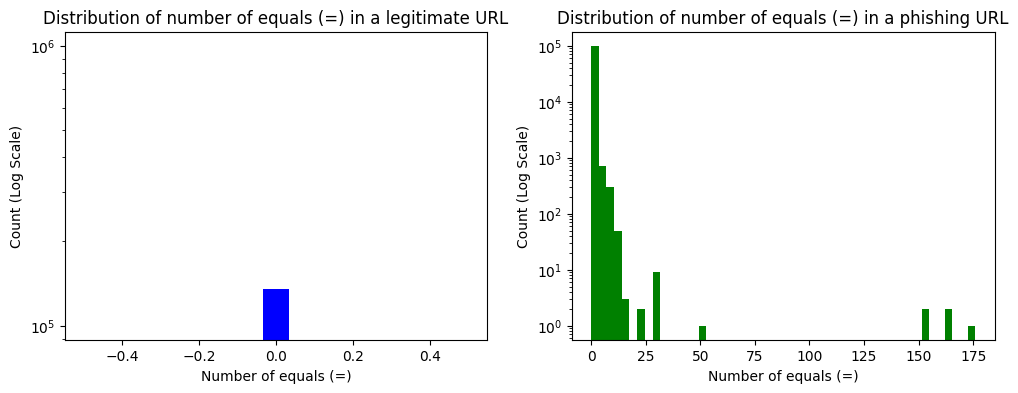

In [279]:
#Data
data1 = df[df['label'] == 1]['NoOfEqualsInURL']  #Legitimate URL data
data2 = df[df['label'] == 0]['NoOfEqualsInURL']  #Phishing URL data

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  

# Plot the first histogram
axes[0].hist(data1, bins=15, color='blue')
axes[0].set_title("Distribution of number of equals (=) in a legitimate URL") #Title
axes[0].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[0].set_xlabel("Number of equals (=)")
axes[0].set_ylabel("Count (Log Scale)")

# Plot the second histogram
axes[1].hist(data2, bins=50, color='green')
axes[1].set_title("Distribution of number of equals (=) in a phishing URL")
axes[1].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[1].set_xlabel("Number of equals (=)")
axes[1].set_ylabel("Count (Log Scale)")

plt.show()

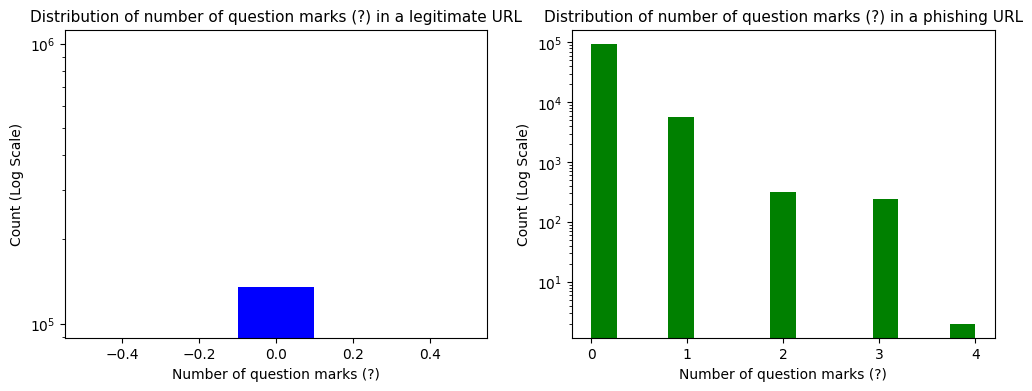

In [280]:
#Data
data1 = df[df['label'] == 1]['NoOfQMarkInURL']  #Legitimate URL data
data2 = df[df['label'] == 0]['NoOfQMarkInURL']  #Phishing URL data

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  

# Plot the first histogram
axes[0].hist(data1, bins=5, color='blue')
axes[0].set_title("Distribution of number of question marks (?) in a legitimate URL", fontsize=11) #Title
axes[0].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[0].set_xlabel("Number of question marks (?)")
axes[0].set_ylabel("Count (Log Scale)")

# Plot the second histogram
axes[1].hist(data2, bins=15, color='green')
axes[1].set_title("Distribution of number of question marks (?) in a phishing URL", fontsize=11)
axes[1].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[1].set_xlabel("Number of question marks (?)")
axes[1].set_xticks(ticks=range(0,5,1))
axes[1].set_ylabel("Count (Log Scale)")

plt.show()

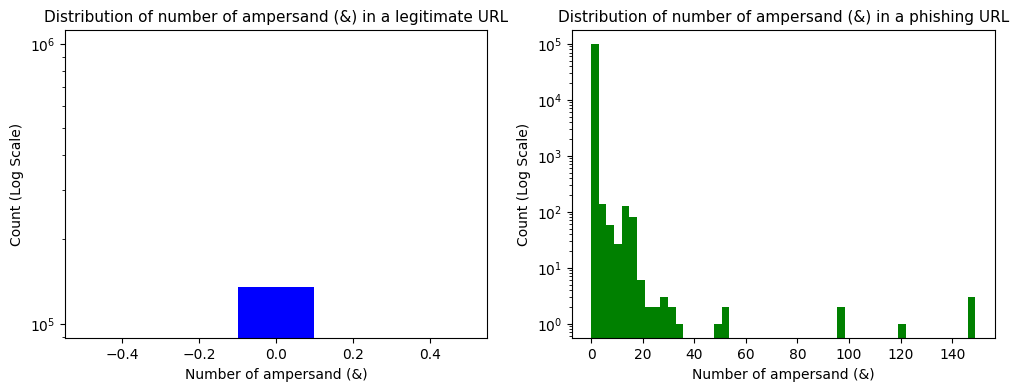

In [281]:
#Data
data1 = df[df['label'] == 1]['NoOfAmpersandInURL']  #Legitimate URL data
data2 = df[df['label'] == 0]['NoOfAmpersandInURL']  #Phishing URL data

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  

# Plot the first histogram
axes[0].hist(data1, bins=5, color='blue')
axes[0].set_title("Distribution of number of ampersand (&) in a legitimate URL", fontsize=11) #Title
axes[0].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[0].set_xlabel("Number of ampersand (&)")
axes[0].set_ylabel("Count (Log Scale)")

# Plot the second histogram
axes[1].hist(data2, bins=50, color='green')
axes[1].set_title("Distribution of number of ampersand (&) in a phishing URL", fontsize=11)
axes[1].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[1].set_xlabel("Number of ampersand (&)")
axes[1].set_ylabel("Count (Log Scale)")

plt.show()

From above, we observed a similar distribution of <font color='#FFB703'>'=', '?' and '&'</font> operators their respective links, which gives us a pretty decent early estimation of the reliability of these variables in determining whether a link is phishing or not.

Next, in order to avoid bias, we test decided to also test the relationship of <font color='#FFB703'>special characters</font>, including the data we tested above, with whether a link is phishing.

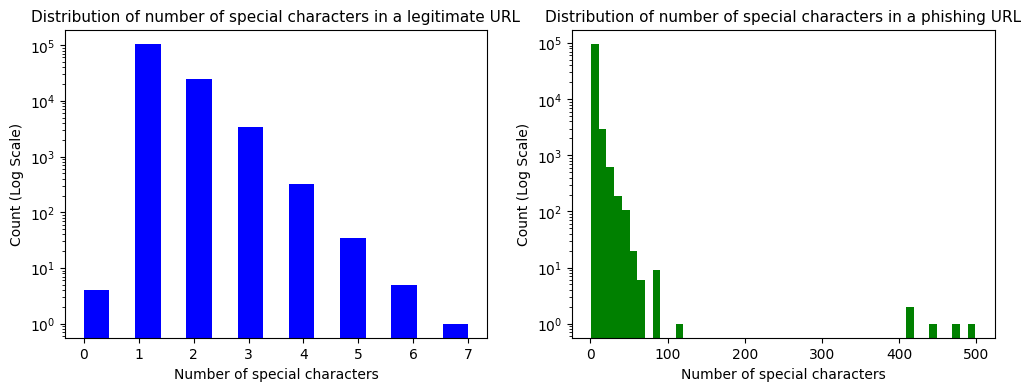

In [282]:
#Data
data1 = df[df['label'] == 1]['NoOfOtherSpecialCharsInURL']  #Legitimate URL data
data2 = df[df['label'] == 0]['NoOfOtherSpecialCharsInURL']  #Phishing URL data

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  

# Plot the first histogram
axes[0].hist(data1, bins=15, color='blue')
axes[0].set_title("Distribution of number of special characters in a legitimate URL", fontsize=11) #Title
axes[0].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[0].set_xlabel("Number of special characters")
axes[0].set_ylabel("Count (Log Scale)")

# Plot the second histogram
axes[1].hist(data2, bins=50, color='green')
axes[1].set_title("Distribution of number of special characters in a phishing URL", fontsize=11)
axes[1].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[1].set_xlabel("Number of special characters")
axes[1].set_ylabel("Count (Log Scale)")

plt.show()

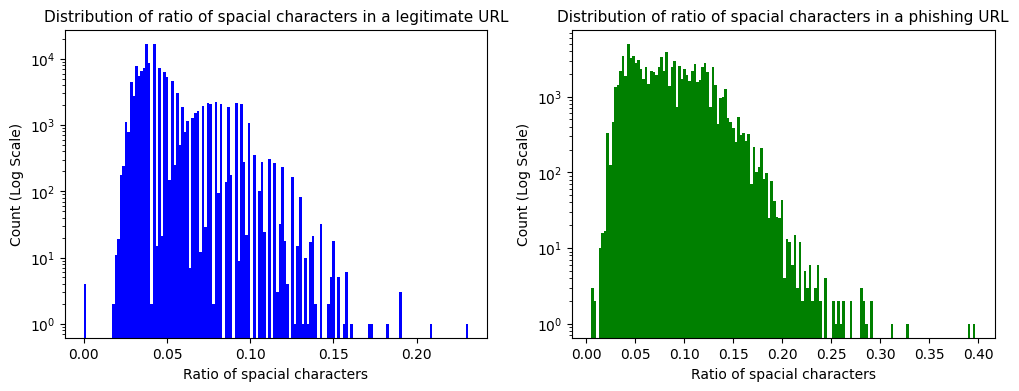

In [283]:
#Data
data1 = df[df['label'] == 1]['SpacialCharRatioInURL']  #Legitimate URL data
data2 = df[df['label'] == 0]['SpacialCharRatioInURL']  #Phishing URL data

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  

# Plot the first histogram
axes[0].hist(data1, bins=150, color='blue')
axes[0].set_title("Distribution of ratio of spacial characters in a legitimate URL", fontsize=11) #Title
axes[0].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[0].set_xlabel("Ratio of spacial characters")
axes[0].set_ylabel("Count (Log Scale)")

# Plot the second histogram
axes[1].hist(data2, bins=150, color='green')
axes[1].set_title("Distribution of ratio of spacial characters in a phishing URL", fontsize=11)
axes[1].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[1].set_xlabel("Ratio of spacial characters")
axes[1].set_ylabel("Count (Log Scale)")

plt.show()

Generally speaking, legitimate URL would be incentivised to secure their website as much as possible as it leads to the least amount of unfavourable events from happening to their clients and themselves. The data proves us correct, as almost all legitimate URLs <font color='#FFB703'>use HTTPS</font> while the spread for using HTTPS in phishing links remain almost even.

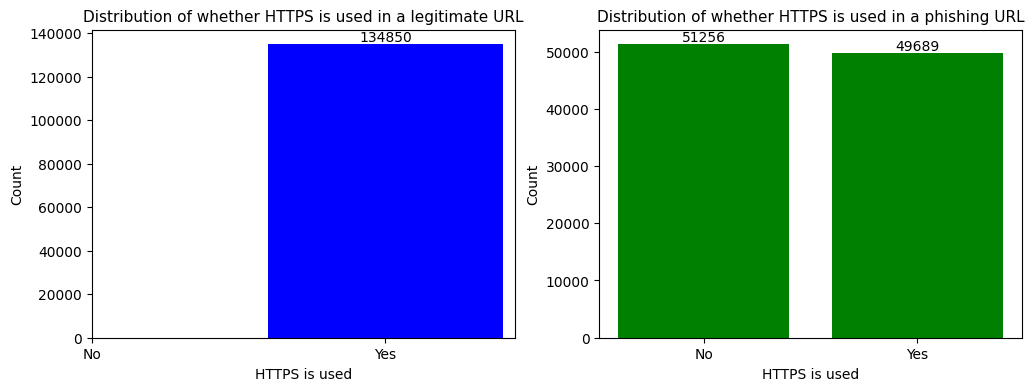

In [284]:
# Data
data1 = df[df['label'] == 1]['IsHTTPS'].value_counts()  # Counts for legitimate URL data
data2 = df[df['label'] == 0]['IsHTTPS'].value_counts()  # Counts for phishing URL data

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot the first bar plot
x = axes[0].bar(data1.index, data1.values, color=['blue'])
axes[0].set_title("Distribution of whether HTTPS is used in a legitimate URL", fontsize=11)  # Title
axes[0].set_xlabel("HTTPS is used")
axes[0].set_ylabel("Count") 
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['No', 'Yes'])
axes[0].bar_label(x)

# Plot the second bar plot  
y = axes[1].bar(data2.index, data2.values, color='green')
axes[1].set_title("Distribution of whether HTTPS is used in a phishing URL", fontsize=11)
axes[1].set_xlabel("HTTPS is used")
axes[1].set_ylabel("Count")
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['No', 'Yes'])
axes[1].bar_label(y)

plt.show()

Similarly, the <font color='#FFB703'>use of copyright information</font> differed greatly between a legitimate website and phishing website.

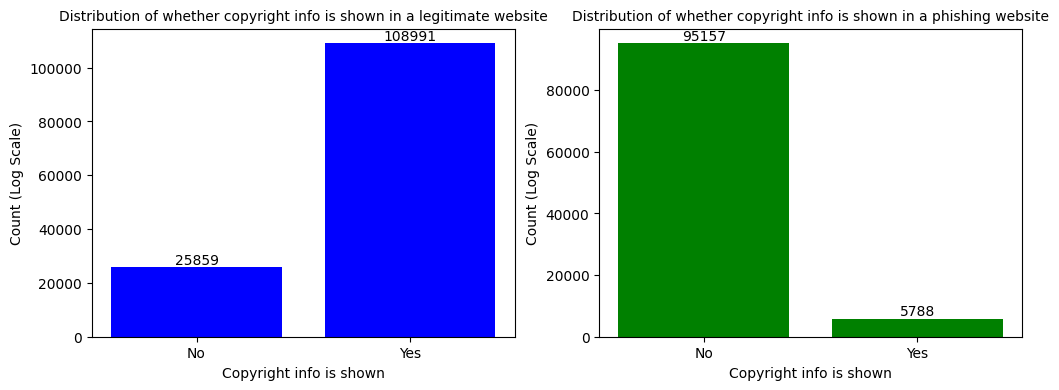

In [285]:
# Data
data1 = df[df['label'] == 1]['HasCopyrightInfo'].value_counts()  # Counts for legitimate URL data
data2 = df[df['label'] == 0]['HasCopyrightInfo'].value_counts()  # Counts for phishing URL data

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot the first bar plot
x = axes[0].bar(data1.index, data1.values, color=['blue'])
axes[0].set_title("Distribution of whether copyright info is shown in a legitimate website", fontsize=10)  # Title
axes[0].set_xlabel("Copyright info is shown")
axes[0].set_ylabel("Count (Log Scale)")
axes[0].set_xticks([0, 1]) #Next 2 lines changes 0 to no and 1 to yes
axes[0].set_xticklabels(['No', 'Yes'])
axes[0].bar_label(x)

# Plot the second bar plot
y = axes[1].bar(data2.index, data2.values, color='green')
axes[1].set_title("Distribution of whether copyright info is shown in a phishing website", fontsize=10)
axes[1].set_xlabel("Copyright info is shown")
axes[1].set_ylabel("Count (Log Scale)")
axes[1].set_xticks([0, 1]) #Next 2 lines changes 0 to no and 1 to yes
axes[1].set_xticklabels(['No', 'Yes'])
axes[1].bar_label(y)

plt.show()

We see some similarity in the <font color='#FFB703'>distribution of number of images</font> in legitimate and phishing urls, although the scale of images differs greatly between the two, with the distribution of images in legitimate URLs in the thousands whereas the distribution of images in a phishing URL is only in the tens.

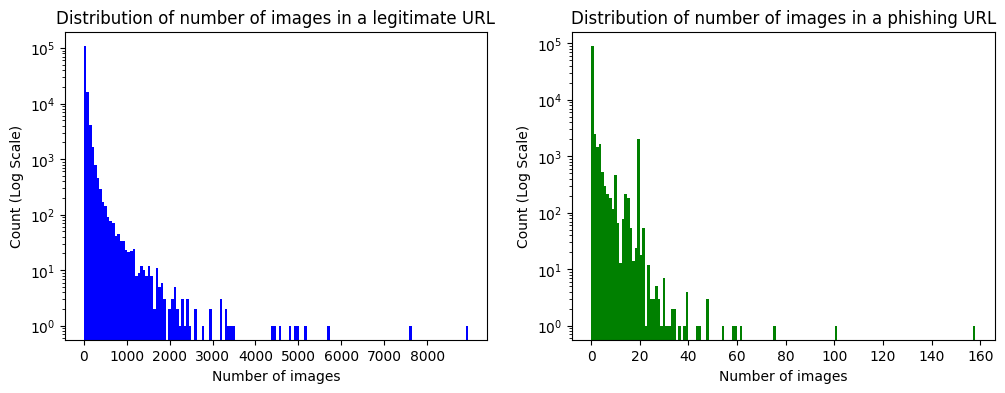

In [286]:
#Data
data1 = df[df['label'] == 1]['NoOfImage']  #Legitimate URL data
data2 = df[df['label'] == 0]['NoOfImage']  #Phishing URL data

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  

# Plot the first histogram
axes[0].hist(data1, bins=150, color='blue')
axes[0].set_title("Distribution of number of images in a legitimate URL") #Title
axes[0].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[0].set_xlabel("Number of images")
axes[0].set_xticks(ticks=range(0,9000,1000))
axes[0].set_ylabel("Count (Log Scale)")

# Plot the second histogram
axes[1].hist(data2, bins=150, color='green')
axes[1].set_title("Distribution of number of images in a phishing URL")
axes[1].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[1].set_xlabel("Number of images")
axes[1].set_ylabel("Count (Log Scale)")

plt.show()